<a href="https://colab.research.google.com/github/vicfreire/spectroscopy-Hg-H-Na/blob/main/H_spectroscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.optimize import curve_fit
from scipy.stats import linregress as lr

Reading dataset

In [2]:
f_all = np.loadtxt('/content/drive/MyDrive/Espectroscopia de Hg, H e Na/H - Data/H-8min.txt') # Entire spectrum
f_peak = np.loadtxt('/content/drive/MyDrive/Espectroscopia de Hg, H e Na/H - Data/H-8min-pico.txt') # Main peak focus

df = pd.DataFrame(f_all, columns=['Pixels', 'Count'])
dfp = pd.DataFrame(f_peak, columns=['Pixels', 'Count'])

In [3]:
df.head()

,Pixels,Count
0,0.0,987.0
1,1.0,880.0
2,2.0,810.0
3,3.0,751.0
4,4.0,805.0


In [4]:
dfp.head()

,Pixels,Count
0,0.0,910.0
1,1.0,806.0
2,2.0,757.0
3,3.0,758.0
4,4.0,783.0


The 'df' dataset shows all spectroscopy lines, but the main line is saturated (the count goes to zero). To solve this problem there is the 'dfp' dataset that focus on the main line with lower intensity so there is no saturation and because of that all the peaks are less intense. Then, we sum the datasets counts up to obtain only one dataset to analyse.

Plotting 'df' and 'dfp'

In [5]:
fig = px.line(df, x='Pixels', y='Count')
fig

In [6]:
fig2 = px.line(dfp, x='Pixels', y='Count')
fig2

Summing the counts up

In [7]:
# The 'dft' is the total count dataframe.
dft = pd.DataFrame({'Pixels': df['Pixels'], 'Count': df['Count']+dfp['Count']})
dft.head()

,Pixels,Count
0,0.0,1897.0
1,1.0,1686.0
2,2.0,1567.0
3,3.0,1509.0
4,4.0,1588.0


Converting pixels in wavelenght using calibration equation.

For H the calibration equation in this experiment is:

λ = (0.06105 ± 0.0002)x + (262.1 ± 0.8) (nm) 

In [8]:
dft['Wavelenght (nm)'] = 0.06105*dft['Pixels']+262.1
dft.head()

,Pixels,Count,Wavelenght (nm)
0,0.0,1897.0,262.10000
1,1.0,1686.0,262.16105
2,2.0,1567.0,262.22210
3,3.0,1509.0,262.28315
4,4.0,1588.0,262.34420


In [30]:
espec = px.line(dft, x='Wavelenght (nm)', y='Count', log_y=True)
espec

To calculate the Rydberg constant it is goint to be fitted the data plotted in a graph 1/λ vs 1/$n^2$. Let's consider only the Balmer series, that is near ultraviolet and visible frequencies (~ 400-800 nm), so the equation to be fitted will be:

$\frac{1}{λ} = R_H(\frac{1}{2^2} - \frac{1}{n^2})$, n = 3,4,5,...

It is going to be used the values of $H_α = 656.3, H_β = 486.1, H_γ = 434.1, H_δ = 410.2, H_ϵ = 364.6$ (in nm) as reference of the Balmer series to find the lines in spectra.
Lets's create a dataframe with the 1/λ and 1/$n^2$ correspondent values.

In [15]:
table = pd.DataFrame({'1\λ':[1/658.7419, 1/485.543, 1/433.5284, 1/409.7189],'1/n²':[1/3**2, 1/4**2, 1/5**2, 1/6**2]})

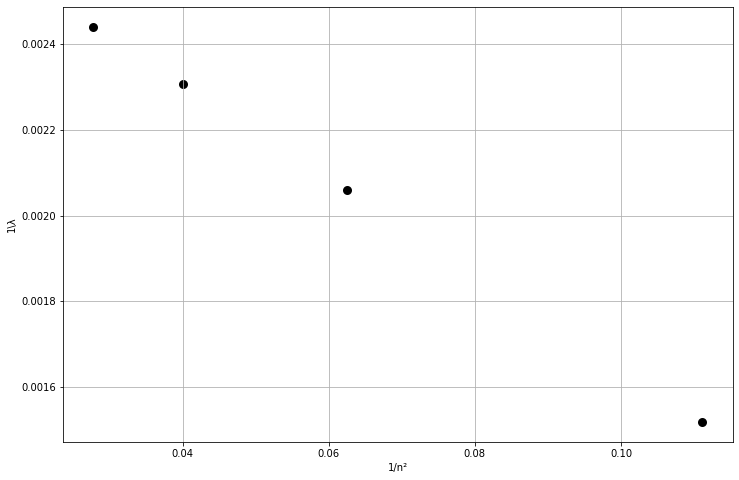

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(table['1/n²'], table['1\λ'], color='black', lw=3)
plt.ylabel('1\λ (1/nm)')
plt.xlabel('1/n²')
plt.grid()


Params: 
 [-0.0110765   0.00274967] 
 
 sigmas: 
 [2.96979186e-05 2.02640882e-06]


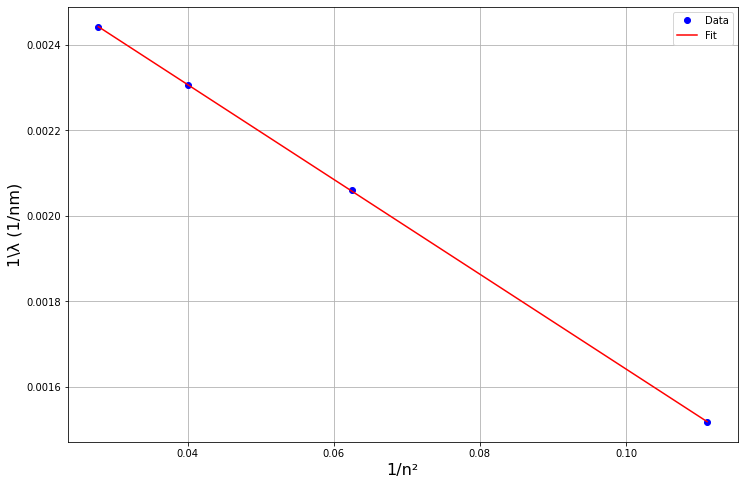

In [22]:
def linear (x,a,b):  
    return a*x+b

popt, pcov = curve_fit(linear, table['1/n²'], table['1\λ'])
a = popt[0]
b = popt[1]
plt.figure(figsize=(12,8))
plt.plot(table['1/n²'], table['1\λ'], 'bo', label='Data')
plt.plot(table['1/n²'], linear(table['1/n²'],*popt), color='r', label='Fit')
plt.legend()
plt.ylabel('1\λ (1/nm)', fontsize=16)
plt.xlabel('1/n²', fontsize=16)
plt.grid()
print('Params:','\n',popt, '\n','\n','sigmas:','\n', np.sqrt(np.diagonal(pcov)))

To find the Rydberg equation we can multiple the linear parameter by 4.

In [31]:
R = b*4
sigmaR = 2.02640882e-06*4
print('The Rydberg constant is:', R, '+/-', sigmaR, '1/nm')

The Rydberg constant is: 0.010998690162625916 +/- 8.10563528e-06 1/nm


Percentage deviation

In [33]:
d_R = (abs(1.09986 - 1.09737)/(1.09986))*100
print('Percentage deviation of Rydberg constant:', d_R)

Percentage deviation of Rydberg constant: 0.2263924499481846
